In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d=pd.read_csv('datasets\deliveries.csv')
m=pd.read_csv('datasets\matches.csv')

In [3]:
c=m.columns
m1=m.drop(c[[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]],axis=1)
m1.head()

,id,season
0,1,2017
1,2,2017
2,3,2017
3,4,2017
4,5,2017


In [75]:
d1=d.rename(columns={'match_id':'id'})
e=d1.columns
d2=d1.drop(e[[1,2,3,4,5,7,9,10,11,12,13,14,16,17,18,19,20]],axis=1)
d2.head()

,id,batsman,bowler,batsman_runs
0,1,DA Warner,TS Mills,0
1,1,DA Warner,TS Mills,0
2,1,DA Warner,TS Mills,4
3,1,DA Warner,TS Mills,0
4,1,DA Warner,TS Mills,0


In [5]:
final=pd.merge(d2,m1,on='id')
final.to_csv('season_wise_runs.csv')


          batsman  season  batsman_runs
0  A Ashish Reddy    2012            35
1  A Ashish Reddy    2013           125
2  A Ashish Reddy    2015            73
3  A Ashish Reddy    2016            47
4      A Chandila    2012             0


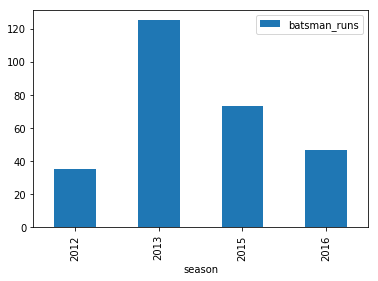

In [76]:
f1=final.sort_values(by=['batsman'])
f2=DataFrame(f1.groupby(['batsman','season'])['batsman_runs'].agg('sum'))
f3=f2.reset_index()
aar=f3[0:4]
print(f3.head())
aar.plot.bar(x='season',y='batsman_runs')

In [70]:
f4= f3.pivot_table('batsman_runs','batsman','season')
f4['Total runs']=f4.sum(axis=1, skipna=True)
f5= f4.sort_values(by='Total runs',ascending=False)
f6=f5.drop('Total runs',axis=1)
f6.head()

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
batsman,,,,,,,,,,
SK Raina,421.0,434.0,528.0,438.0,441.0,548.0,523.0,374.0,399.0,442.0
V Kohli,165.0,246.0,307.0,557.0,364.0,639.0,359.0,505.0,973.0,308.0
RG Sharma,404.0,362.0,404.0,372.0,433.0,538.0,390.0,482.0,489.0,333.0
G Gambhir,534.0,286.0,277.0,378.0,590.0,406.0,335.0,327.0,501.0,498.0
DA Warner,NaN,163.0,282.0,324.0,256.0,410.0,528.0,562.0,848.0,641.0


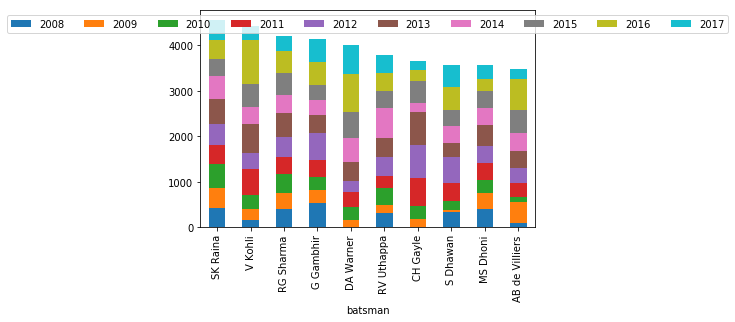

In [74]:
f7=f6[0:10]
f8=f7.plot.bar(stacked=True)
f8.legend(loc='upper center',ncol=10)